#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

#Importing Dataset

In [2]:
df = pd.read_csv('RiverDataResult.csv')

In [3]:
print(df.shape)

(2326, 22)


In [4]:
df.head()

,Date,Time,Temp,pH,ORP,EC,RES,TDS,Salinity,Pressure,D.O.,Turbidity,QpH,QTur,QTDS,QDO,WpH,WTur,WTDS,WDO,WQI,Result
0,17-02-2020,17:04:52,20.67,8.40,88.6,470,2128,306,0.23,14.568,101.5,36.7,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
1,17-02-2020,17:05:02,20.67,8.40,88.5,470,2128,305,0.23,14.569,101.4,42.4,65,38,55,95,16.575,7.410,9.625,35.625,69.235,3
2,17-02-2020,17:05:12,20.67,8.40,88.2,470,2128,305,0.23,14.569,101.5,38.2,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
3,17-02-2020,17:05:22,20.67,8.40,87.9,470,2128,305,0.23,14.567,101.7,38.0,65,47,55,95,16.575,9.165,9.625,35.625,70.990,4
4,17-02-2020,17:05:32,20.68,8.41,87.8,469,2132,305,0.23,14.566,101.7,46.8,65,38,55,95,16.575,7.410,9.625,35.625,69.235,3


#Splitting

In [5]:
X = df.iloc[:,[3,7,10,11]]

In [6]:
Y=df['Result']

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=45)

X_train = X_train.values
X_test = X_test.values

Y_train = Y_train.values
Y_test = Y_test.values

#Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Model

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [11]:
rfg = RandomForestRegressor(n_estimators=100, random_state = 42, max_features='sqrt')
rfg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [12]:
print('Training Data Shape:', X_train.shape)
print('Training Labels Shape:', Y_train.shape)
print('Testing Data Shape:', X_test.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Data Shape: (1558, 4)
Training Labels Shape: (1558,)
Testing Data Shape: (768, 4)
Testing Labels Shape: (768,)


In [13]:
train_pred = rfg.predict(X_train)
test_pred = rfg.predict(X_test)

#Error

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))

Mean Absolute Error: 0.011497395833333321
Mean Squared Error: 0.003936588541666665
Root Mean Squared Error: 0.06274223889587194


#Accuracy

In [15]:
train_err = abs(train_pred - Y_train)
test_err = abs(test_pred - Y_test)
print('Train set : Mean Absolute Error:', round(np.mean(train_err), 2))
print('Test set : Mean Absolute Error:', round(np.mean(test_err), 2))
train_mse =100 * (train_err / Y_train)
test_mse =100 * (test_err / Y_test)
train_accuracy_rfg = 100 - np.mean(train_mse)
test_accuracy_rfg = 100 - np.mean(test_mse)
print('Train data Accuracy:', round(train_accuracy_rfg, 2), '%.')
print('Test data Accuracy:', round(test_accuracy_rfg, 2), '%.')

Train set : Mean Absolute Error: 0.0
Test set : Mean Absolute Error: 0.01
Train data Accuracy: 99.87 %.
Test data Accuracy: 99.65 %.


In [16]:
classifierx = RandomForestClassifier(n_estimators=300, random_state=0)

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
all_accuracies = cross_val_score(estimator=classifierx, X=X_train, y=Y_train, cv=5)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [19]:
print(all_accuracies)

[0.98717949 0.99358974 0.99038462 0.99678457 0.99356913]


In [20]:
print(all_accuracies.mean())

0.9923015087806084


In [21]:
print(all_accuracies.std())

0.0032641631081372973


# **CROSS VALIDATION USING GRID (Random Forest)**

GridSearch For Parameter Selection Round 1

#For regressor

In [22]:
from sklearn.model_selection import GridSearchCV 
param_grid_1 = {'bootstrap': [True], 'max_depth': [15, 30, 45], 'max_features':[2, 5], 'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [8, 10, 12], 'n_estimators': [200, 300, 500]}
rf = RandomForestRegressor()
grid_search_1 = GridSearchCV(estimator = rf, param_grid = param_grid_1, cv = 3, n_jobs = -1, verbose = 2)

In [23]:
grid_search_1.fit(X_train, Y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed:  2.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [24]:
def evaluate(model, X, y):
    predictions = rfg.predict(X)
    errors = abs(predictions - y)
    mse = 100 * np.mean(errors / y)
    accuracy = 100 - mse
    #print('Model Performance')
    print('Mean Square Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [25]:
print('Grid_Search_CV Evaluation')
best_grid_1 = grid_search_1.best_estimator_
print('Model Performance - Train Data')
train_grid_accuracy = evaluate(best_grid_1, X_train, Y_train)
print('Model Performance - Test Data')
test_grid_accuracy = evaluate(best_grid_1, X_test, Y_test)

Grid_Search_CV Evaluation
Model Performance - Train Data
Mean Square Error: 0.0039.
Accuracy = 99.87%.
Model Performance - Test Data
Mean Square Error: 0.0115.
Accuracy = 99.65%.


GridSearch For Parameter Selection Round 2

In [26]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'bootstrap': [True], 'max_depth': [10, 18, 30], 'max_features':[3, 5, 6], 'min_samples_leaf': [2, 6],
              'min_samples_split': [7, 11, 18], 'n_estimators': [100, 170, 200]}
rf = RandomForestRegressor(random_state = 20)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 1)

In [27]:
grid_search.fit(X_train, Y_train)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   31.9s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=20,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [28]:
print('Grid_Search_CV Evaluation')
best_grid = grid_search.best_estimator_
print('Model Performance - Train Data')
train_grid_accuracyx = evaluate(best_grid, X_train, Y_train)
print('Model Performance - Test Data')
test_grid_accuracyx = evaluate(best_grid, X_test, Y_test)

Grid_Search_CV Evaluation
Model Performance - Train Data
Mean Square Error: 0.0039.
Accuracy = 99.87%.
Model Performance - Test Data
Mean Square Error: 0.0115.
Accuracy = 99.65%.


In [29]:
def evaluate_model(model, x_train, y_train, x_test, y_test):
    n_trees = model.get_params()['n_estimators']
    n_features = x_train.shape[1]
    
    # Train and predict 10 times to evaluate time and accuracy
    predictions = []
    run_times = []
    for _ in range(10):
        start_time = time.time()
        model.fit(x_train, y_train)
        predictions.append(model.predict(x_test))
    
        end_time = time.time()
        run_times.append(end_time - start_time)
    
    # Run time and predictions need to be averaged
    run_time = np.mean(run_times)
    predictions = np.mean(np.array(predictions), axis = 0)
    
    # Calculate performance metrics
    errors = abs(predictions - y_test)
    mean_error = np.mean(errors)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    
    # Return results in a dictionary
    results = {'time': run_time, 'error': mean_error, 'accuracy': accuracy, 'n_trees': n_trees, 'n_features': n_features}
    
    return results

In [30]:
import time

In [31]:
grid_search1_results = evaluate_model(best_grid_1, X_train, Y_train, X_test, Y_test)
grid_search1_results['model'] = 'best_grid_1'
grid_search1_results

{'accuracy': 99.52771941089166,
 'error': 0.015673910314640254,
 'model': 'best_grid_1',
 'n_features': 4,
 'n_trees': 500,
 'time': 0.7808410167694092}

In [32]:
grid_search2_results = evaluate_model(best_grid, X_train, Y_train, X_test, Y_test)
grid_search2_results['model'] = 'best_grid'
grid_search2_results

{'accuracy': 99.63944688900169,
 'error': 0.011869534864135063,
 'model': 'best_grid',
 'n_features': 4,
 'n_trees': 170,
 'time': 0.2806452035903931}

Comparison Between Both Models

In [33]:
comparison = {'model': [grid_search1_results['model'],grid_search2_results['model']], 
              'accuracy': [round(grid_search1_results['accuracy'], 3), round(grid_search2_results['accuracy'], 3)],
              'error': [round(grid_search1_results['error'], 3), round(grid_search2_results['error'], 3)],
              'n_features': [grid_search1_results['n_features'], grid_search2_results['n_features']],
              'n_trees': [grid_search1_results['n_trees'],grid_search2_results['n_trees']],
              'time': [round(grid_search1_results['time'], 4), round(grid_search2_results['time'], 4)]}

In [34]:
comparison = pd.DataFrame.from_dict(comparison, orient = 'columns')

In [35]:
comparison[['model', 'accuracy', 'error', 'n_features', 'n_trees', 'time']]

,model,accuracy,error,n_features,n_trees,time
0,best_grid_1,99.528,0.016,4,500,0.7808
1,best_grid,99.639,0.012,4,170,0.2806


#Plotting Information Decoded from models

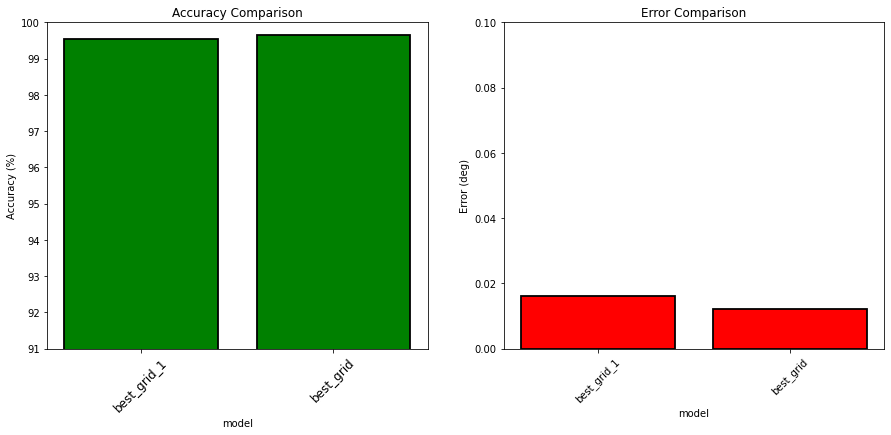

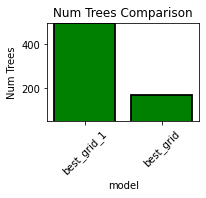

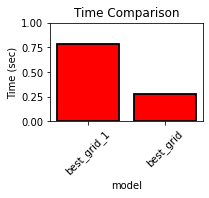

In [36]:
xvalues = list(range(len(comparison)))
plt.subplots(2, 2, figsize=(15, 6))
plt.subplot(121)
plt.bar(xvalues, comparison['accuracy'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45, fontsize = 12)
plt.ylim(ymin = 91, ymax = 100)
plt.xlabel('model'); plt.ylabel('Accuracy (%)'); plt.title('Accuracy Comparison');

plt.subplot(122)
plt.bar(xvalues, comparison['error'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 0, ymax = 0.1)
plt.xlabel('model'); plt.ylabel('Error (deg)'); plt.title('Error Comparison');
plt.show();

plt.subplot(221)
plt.bar(xvalues, comparison['n_trees'], color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 50, ymax = 500)
plt.xlabel('model'); plt.ylabel('Num Trees'); plt.title('Num Trees Comparison');
plt.show();

plt.subplot(222)
plt.bar(xvalues, comparison['time'], color = 'r', edgecolor = 'k', linewidth = 1.8)
plt.xticks(xvalues, comparison['model'], rotation = 45)
plt.ylim(ymin = 0, ymax = 1)
plt.xlabel('model'); plt.ylabel('Time (sec)'); plt.title('Time Comparison');
plt.show();

Checking Models by implementing Best model found on Evaluation 

In [37]:
tree_grid = {'n_estimators': [int(x) for x in np.linspace(1, 301, 30)]}

In [38]:
tree_grid_search = GridSearchCV(best_grid, param_grid=tree_grid, verbose = 2, n_jobs=-1, cv = 3,
                                scoring = 'neg_mean_absolute_error')
tree_grid_search.fit(X_train, Y_train);

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   17.1s finished


In [39]:
tree_grid_search.cv_results_

{'mean_fit_time': array([0.00398167, 0.0270404 , 0.04959019, 0.07809933, 0.10005474,
        0.12656387, 0.14822364, 0.1843013 , 0.2110827 , 0.22653731,
        0.24266529, 0.27350632, 0.29960004, 0.32534814, 0.34372632,
        0.36607607, 0.39150731, 0.41592749, 0.44559248, 0.47540029,
        0.48357113, 0.51046173, 0.53281506, 0.5622921 , 0.59714659,
        0.62130793, 0.63218196, 0.66459457, 0.68141055, 0.69339848]),
 'mean_score_time': array([0.00083931, 0.00210985, 0.00323057, 0.00450071, 0.00588393,
        0.00708691, 0.00776903, 0.00886703, 0.01618155, 0.0111692 ,
        0.01234587, 0.01320243, 0.01456006, 0.01563478, 0.0168949 ,
        0.01896803, 0.01884699, 0.02339753, 0.02221052, 0.02254454,
        0.02461958, 0.02494033, 0.02572091, 0.02876075, 0.02945685,
        0.03677718, 0.03172231, 0.03304513, 0.0341537 , 0.02930975]),
 'mean_test_score': array([-0.01046532, -0.01120307, -0.0114895 , -0.01131461, -0.01108857,
        -0.01088576, -0.01072177, -0.01065662, -0.01

Implementation of best grid

In [40]:
print('New Grid_Search_CV Evaluation')
best_grid_new = grid_search.best_estimator_
print('New Model Performance - Train Data')
X_train_grid_accuracy = evaluate(best_grid_new, X_train, Y_train)
print('New Model Performance - Test Data')
X_test_grid_accuracy = evaluate(best_grid, X_test, Y_test)

New Grid_Search_CV Evaluation
New Model Performance - Train Data
Mean Square Error: 0.0039.
Accuracy = 99.87%.
New Model Performance - Test Data
Mean Square Error: 0.0115.
Accuracy = 99.65%.


In [41]:
def plot_results_grid(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_score_time']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(10, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.ylim(ymin = -8, ymax = 3)
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('Neg Mean Absolute Error')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.ylim(ymin = 0.0, ymax = 3.0)
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)
    
    
    plt.tight_layout(pad = 4)

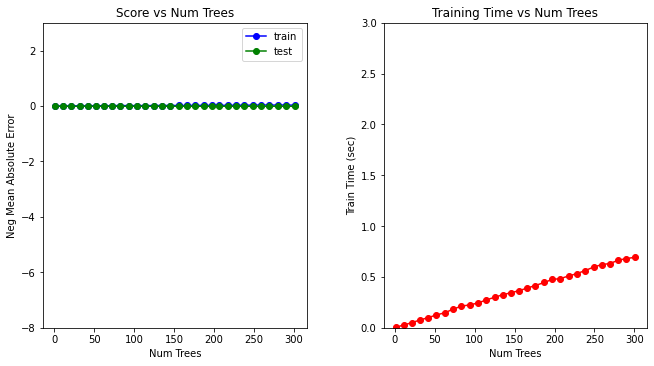

In [42]:
plot_results_grid(tree_grid_search)

In [43]:
NumberOfTrees = ['300', '170']
Accuracy = ['99.534', '99.639']
error = ['0.015', '0.012']
Models = ['GridsearchCV1', 'GridsearchCV2']

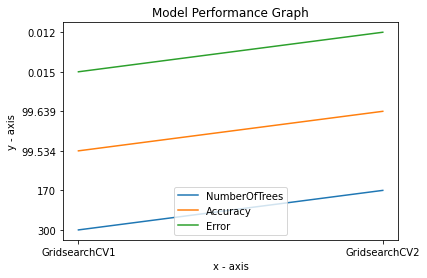

In [44]:
x1 = Models 
y1 = NumberOfTrees
# plotting the line 1 points  
plt.plot(x1, y1, label = "NumberOfTrees") 

x2 = Models  
y2 = Accuracy
# plotting the line 2 points  
plt.plot(x2, y2, label = "Accuracy") 

x3 = Models  
y3 = error
# plotting the line 2 points  
plt.plot(x3, y3, label = "Error")

# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
# giving a title to my graph 
plt.title('Model Performance Graph') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()